<a href="https://colab.research.google.com/github/dave502/Homeworks/blob/master/homework_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Домашнее задание. Урок 5.

##Задача 1 <br>
**Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти ширину доверительного интервала для оценки математического ожидания `mu` с надёжностью 0.95, если выборочное среднее равно 80, а объём выборки равен 256.**

Так как совокупность имеет нормальное распределение и известно среднее квадратическое отклонение, то для нахождения границ доверительного интервала будет использоваться формула
$$P \left( \overline{X} + t_{\alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \right) = p$$
где $\overline{X}$ - выборочное среднее равно 80 <br>
$\sigma$ - среднее квадратическое отклонение равно 16 <br>
$n$ - объём выборки равен 256

Осталось найти квантили $t_{\alpha / 2}$ и  $t_{1-\alpha / 2}$ <br>
Используем для нахождения квантилей scipy:

In [5]:
from scipy import stats
import numpy as np

p = 0.95
alpha = 1 - p

t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-1.959963984540054, 1.959963984540054)

In [9]:
mean = 80 # выборочное среднее
std = 16 # среднее квадратическое отклонение
# Для вычисления ширины интервала, выборочное сренее не пригодится

P_width =  t2 * std / np.sqrt(n) - t1 * std / np.sqrt(n)

np.around(P_width, 8)

3.91992797

**ОТВЕТ: <br>
ширина доверительного интервала равна 3.91992797**

##Задача 2 <br>
**Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:**
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
**Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? Найдите P-значение для данного теста и укажите его в качестве ответа.**

Дисперсия выборки распределения неизвестна, поэтому будет использоваться t-статистика распределения Стьюдента 
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$
где $\sigma_X$ — несмещённая оценка среднего квадратического отклонения.


In [11]:
# функция для вычисления t-статистики
def t_statistic(samples: np.ndarray, mu:int) -> float:
    return (samples.mean() - mu) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

In [13]:
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
h0_mu = 200
# Значение t-статистики для выборки
S = t_statistic(samples, h0_mu)
S 

-1.0651074037450896

Так как используется распределение Стьюдента, то критическая область будет двусторонней и P-значение будет рассчитываться по формуле $$P = 2 \cdot \min (P_l, P_r)$$

In [15]:
n= 10 
p_left = stats.t.cdf(S, df=n - 1)
p_right = 1 - stats.t.cdf(S, df=n - 1)

pvalue = 2 * min(p_left, p_right)

np.around(pvalue, 8)

0.3145666

**ОТВЕТ: <br>
P-значение равно 0.3145666, что меньше уровня значимости 1 - нулевая гипотеза отвергается, следовательно продавец не прав и средний вес пачки не равен 200.**

##Задача 3 <br>
**Дана выборка диаметров подшипников из примера 1 с занятия 5:**
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.

В качестве ответа запишите 1, если нулевая гипотеза верна, и 0 иначе.

1. <br>
Примем нулевую гипотезу H0, что дисперсия случайной величины равна 0.0625 <br>
Альтенативная гипотеза H1  - дисперсия не равна 0.0625

2. <br> Используемая статистика ⬇

In [43]:
def hi_statistic(samples: np.ndarray, var: float) -> float:
    return (samples.shape[0] - 1) * samples.var() / var

3. <br> уровень значимости alpha = 0.05

In [38]:
alpha = 0.05

4. <br> Найдём границы  $t_{\alpha / 2}$ и $t_{1 - \alpha / 2}$  критической области $\Omega_\alpha$ при условии распределения хи-квадрат 

In [39]:
n = samples.shape[0]
t1 = stats.chi2.ppf(alpha / 2, df = n - 1)
t2 = stats.chi2.ppf(1 - alpha / 2, df = n - 1)

t1, t2

(11.688551922452438, 38.0756272503558)

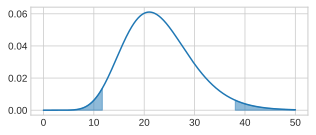

In [47]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']
plt.figure(figsize=(5, 2))

ox = np.linspace(0, 50, 500)
oy = stats.chi2.pdf(ox, df=n-1)

ox_left = np.linspace(0, t1, 100)
oy_left = stats.chi2.pdf(ox_left, df=n-1)

ox_right = np.linspace(t2, 50, 100)
oy_right = stats.chi2.pdf(ox_right, df=n-1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

5. <br> Проводим статистический тест: для выборки считаем значение H, и проверяем на принадлежность к критической области  

In [44]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02])
h0_var = 0.0625

H = hi_statistic(samples, h0_var)
H

27.523852513611114

**ОТВЕТ: 1 <br>
Результаты статистики не попали в критические области 11.69 < __27.52__ <  38.07. Следовательно нулевая гипотеза истинна**